<h1 style="text-align:center;"><b>Brain Tumor Classification using CNN</b></h1>


**Load Dependencies**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


**Prepare data**

In [3]:
import os

path=os.listdir('Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

**Data Analysis**

In [8]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X),-1)

In [13]:
np.unique(Y)

array([0, 1])

In [14]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [15]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

**Data Visualization**

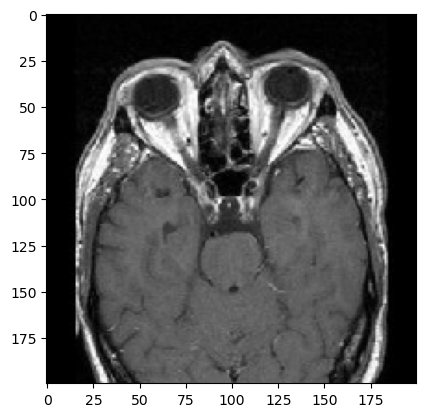

In [16]:
plt.imshow(X[0], cmap='gray')

**Split Data**

In [17]:
Xtrain, Xtest,ytrain,ytest= train_test_split(X_updated,Y,random_state=10,test_size=0.20)

In [18]:
Xtrain.shape , Xtest.shape

((977, 40000), (245, 40000))

**Feature Scaling**

In [20]:
print(Xtrain.max() , Xtrain.min())
print(Xtest.max() , Xtest.min())

255 0
255 0


In [21]:
Xtrain =Xtrain/255
Xtest =Xtest/255


In [22]:
print(Xtrain.max() , Xtrain.min())
print(Xtest.max() , Xtest.min())

1.0 0.0
1.0 0.0


**Model Training**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(Xtrain, ytrain)

LogisticRegression(C=0.1)

In [27]:
sv = SVC()
sv.fit(Xtrain,ytrain)

SVC()